<a href="https://colab.research.google.com/github/imanf18/UTS1-ACO-ImanFushshilat-201012320033/blob/main/UTS1_Iman_Fushshilat_ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best route: [('C', 'A'), ('A', 'E'), ('E', 'J'), ('J', 'G'), ('G', 'I'), ('I', 'H'), ('H', 'F'), ('F', 'D'), ('D', 'B'), ('B', 'C')]
Best distance: 133.5882953774485


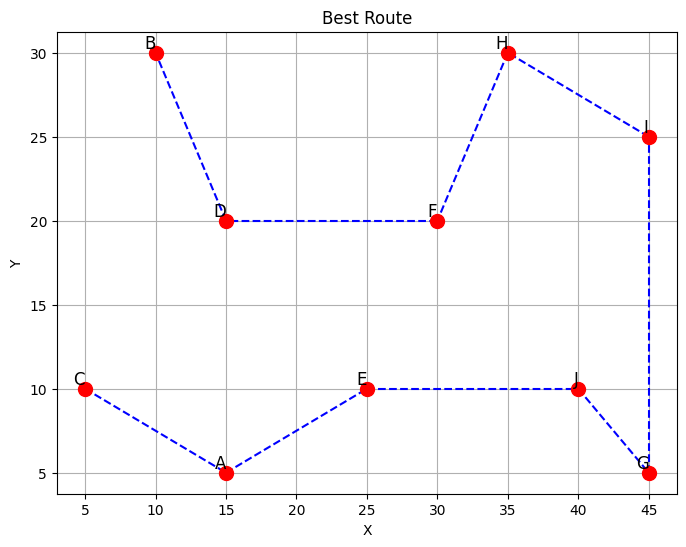

In [11]:
import numpy as np

# Lokasi titik-titik
locations = {
    'A': (15, 5),
    'B': (10, 30),
    'C': (5, 10),
    'D': (15, 20),
    'E': (25, 10),
    'F': (30, 20),
    'G': (45, 5),
    'H': (35, 30),
    'I': (45, 25),
    'J': (40, 10)
}

# Matriks jarak antar titik
num_locations = len(locations)
distance_matrix = np.zeros((num_locations, num_locations))
for i, (location1, (x1, y1)) in enumerate(locations.items()):
    for j, (location2, (x2, y2)) in enumerate(locations.items()):
        distance_matrix[i, j] = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Parameter ACO
num_ants = 10
num_iterations = 1000
pheromone_evaporation = 0.5
alpha = 1
beta = 1
initial_pheromone = 1

def ant_colony_optimization():
    # Inisialisasi matriks feromon
    pheromone_matrix = np.ones((num_locations, num_locations)) * initial_pheromone

    best_route = None
    best_distance = float('inf')
    for _ in range(num_iterations):
        routes = []
        for ant in range(num_ants):
            route = []
            current_location = 'C'  # Start from location C
            visited = set()
            visited.add(current_location)
            while len(visited) < num_locations:
                unvisited = [loc for loc in locations.keys() if loc not in visited]
                probabilities = [(pheromone_matrix[ord(current_location) - 65, ord(next_location) - 65] ** alpha) *
                                 (1 / distance_matrix[ord(current_location) - 65, ord(next_location) - 65] ** beta)
                                 for next_location in unvisited]
                probabilities = probabilities / np.sum(probabilities)
                next_location = np.random.choice(unvisited, p=probabilities)
                route.append((current_location, next_location))
                visited.add(next_location)
                current_location = next_location
            route.append((current_location, 'C'))  # Back to start
            routes.append(route)

        # Update pheromone matrix
        pheromone_matrix *= pheromone_evaporation
        for route in routes:
            distance = sum(distance_matrix[ord(route[i][0]) - 65, ord(route[i][1]) - 65] for i in range(len(route)))
            if distance < best_distance:
                best_distance = distance
                best_route = route
            for i in range(len(route) - 1):
                pheromone_matrix[ord(route[i][0]) - 65, ord(route[i][1]) - 65] += 1 / distance

    return best_route, best_distance

best_route, best_distance = ant_colony_optimization()
print("Best route:", best_route)
print("Best distance:", best_distance)
plot_route(best_route, locations)